<a href="https://colab.research.google.com/github/jesusdme/modelos_colab/blob/main/Modelo_Frijol_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar los datos
data = pd.read_csv('Frijol_Dataset_Colombia_Final.csv',sep=';')

# Selección de características y variable objetivo
X = data.drop(columns=['beans_sold'])
y = data['beans_sold']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

# Inicializar y entrenar el modelo
rf_model = RandomForestRegressor(random_state=43,n_estimators=300)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 66.05773544973546
R-squared (R²): 0.7531107830733927


In [11]:
import pandas as pd

def predecir_rendimiento(Year, beans_hectare, beans_improved_hectare, beans_improved_cost,
                         beans_hectare_fertilizer, beans_fertilizer_cost, beans_chemical_hectare,
                         beans_chemical_cost, beans_machinery_hectare, beans_machinery_cost,
                         beans_harvested, beans_sold_price, beans_harvest_loss, filter, filter_quartile, modelo):

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'beans_hectare': [beans_hectare],
        'beans_improved_hectare': [beans_improved_hectare],
        'beans_improved_cost': [beans_improved_cost],
        'beans_hectare_fertilizer': [beans_hectare_fertilizer],
        'beans_fertilizer_cost': [beans_fertilizer_cost],
        'beans_chemical_hectare': [beans_chemical_hectare],
        'beans_chemical_cost': [beans_chemical_cost],
        'beans_machinery_hectare': [beans_machinery_hectare],
        'beans_machinery_cost': [beans_machinery_cost],
        'beans_harvested': [beans_harvested],
        'beans_sold_price': [beans_sold_price],
        'beans_harvest_loss': [beans_harvest_loss],
        'filter': [filter],
        'filter_quartile': [filter_quartile]
    })

    # Realizar la predicción
    prediccion = modelo.predict(entrada)

    return prediccion[0]

# Ejemplo de uso
Year = 2018
beans_hectare = 0.1
beans_improved_hectare = 0.03
beans_improved_cost = 0.04
beans_hectare_fertilizer = 0.03
beans_fertilizer_cost = 0.02
beans_chemical_hectare = 0.01
beans_chemical_cost = 0.02
beans_machinery_hectare = 0.001
beans_machinery_cost = 0.005
beans_harvested = 0.002
beans_sold_price = 0.1
beans_harvest_loss = 0.01
filter=1200
filter_quartile = 3

resultado = predecir_rendimiento(Year, beans_hectare, beans_improved_hectare, beans_improved_cost,
                                 beans_hectare_fertilizer, beans_fertilizer_cost, beans_chemical_hectare,
                                 beans_chemical_cost, beans_machinery_hectare, beans_machinery_cost,
                                 beans_harvested, beans_sold_price, beans_harvest_loss, filter, filter_quartile, rf_model)

print(f'Predicción de rendimiento: {resultado:.3f} kg/ha')







Predicción de rendimiento: 28.133 kg/ha


# Ánalsis de Resultados

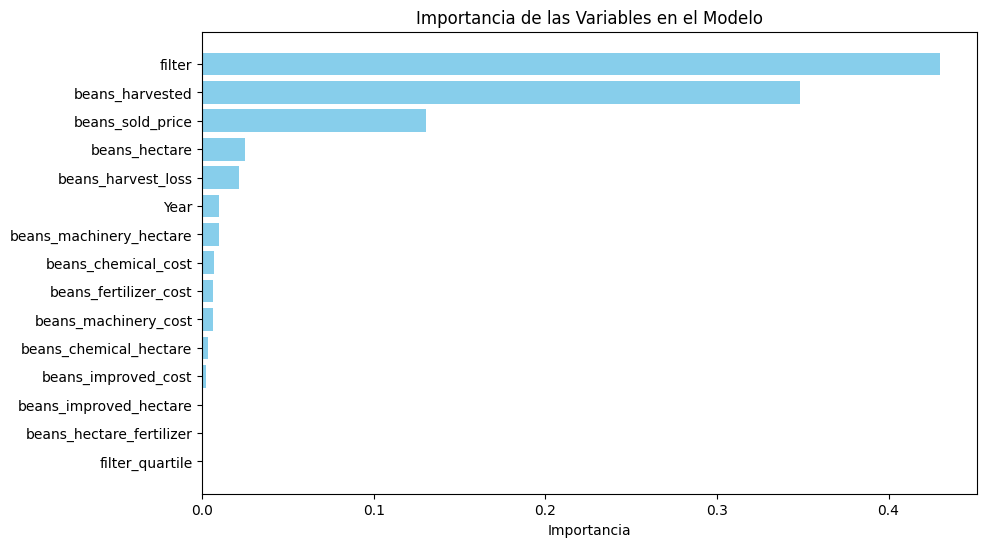

In [12]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns  # Nombres de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.gca().invert_yaxis()
plt.show()

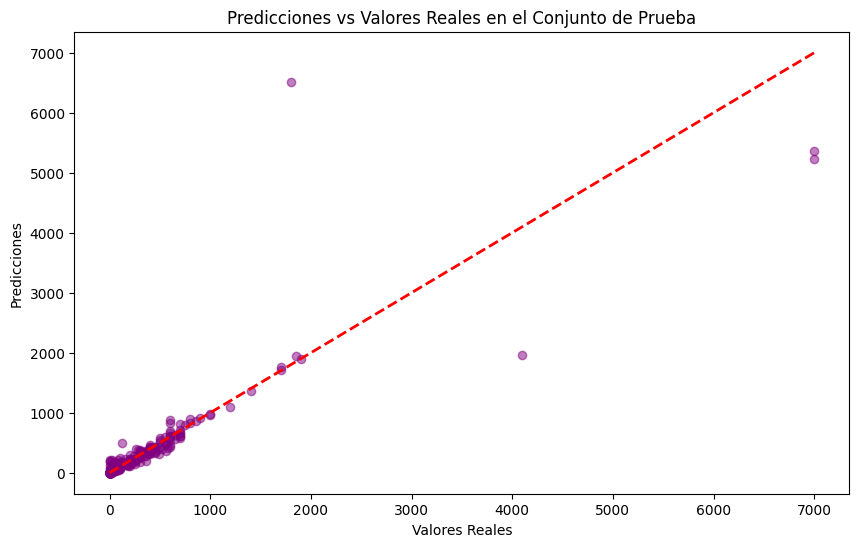

In [13]:
# Generar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales en el Conjunto de Prueba')
plt.show()


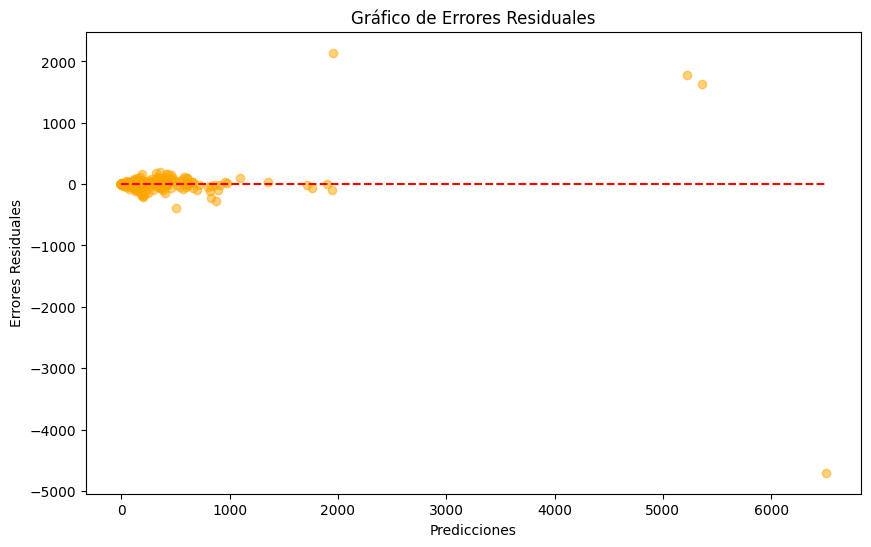

In [14]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()


In [15]:
pip install onnx onnxruntime skl2onnx onnxmltools


In [16]:
# Convertir el modelo a ONNX y guardar
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(rf_model, initial_types=initial_type)
onnxmltools.utils.save_model(onnx_model, 'rf_model_frijol.onnx')

In [17]:
pip install onnxruntime


In [19]:
import pandas as pd
import onnxruntime as rt

def predecir_rendimiento(Year, beans_hectare, beans_improved_hectare, beans_improved_cost,
                         beans_hectare_fertilizer, beans_fertilizer_cost, beans_chemical_hectare,
                         beans_chemical_cost, beans_machinery_hectare, beans_machinery_cost,
                         beans_harvested, beans_sold_price, beans_harvest_loss, filter, filter_quartile, session):

    # Crear DataFrame con la estructura esperada por el modelo
    entrada = pd.DataFrame({
        'Year': [Year],
        'beans_hectare': [beans_hectare],
        'beans_improved_hectare': [beans_improved_hectare],
        'beans_improved_cost': [beans_improved_cost],
        'beans_hectare_fertilizer': [beans_hectare_fertilizer],
        'beans_fertilizer_cost': [beans_fertilizer_cost],
        'beans_chemical_hectare': [beans_chemical_hectare],
        'beans_chemical_cost': [beans_chemical_cost],
        'beans_machinery_hectare': [beans_machinery_hectare],
        'beans_machinery_cost': [beans_machinery_cost],
        'beans_harvested': [beans_harvested],
        'beans_sold_price': [beans_sold_price],
        'beans_harvest_loss': [beans_harvest_loss],
        'filter': [filter],
        'filter_quartile': [filter_quartile]
    })

    # Convertir los datos de entrada a un formato compatible con ONNX
    input_name = session.get_inputs()[0].name
    prediccion = session.run(None, {input_name: entrada.values.astype('float32')})[0]

    return prediccion[0]

# Cargar el modelo ONNX
session = rt.InferenceSession("rf_model_frijol.onnx")

# Ejemplo de uso
Year = 2018
beans_hectare = 0.1
beans_improved_hectare = 0.03
beans_improved_cost = 0.04
beans_hectare_fertilizer = 0.03
beans_fertilizer_cost = 0.02
beans_chemical_hectare = 0.01
beans_chemical_cost = 0.02
beans_machinery_hectare = 0.001
beans_machinery_cost = 0.005
beans_harvested = 0.002
beans_sold_price = 0.1
beans_harvest_loss = 0.01
filter = 1200
filter_quartile = 3

# Realizar la predicción usando el modelo ONNX
resultado = predecir_rendimiento(Year, beans_hectare, beans_improved_hectare, beans_improved_cost,
                                 beans_hectare_fertilizer, beans_fertilizer_cost, beans_chemical_hectare,
                                 beans_chemical_cost, beans_machinery_hectare, beans_machinery_cost,
                                 beans_harvested, beans_sold_price, beans_harvest_loss, filter, filter_quartile, session)

print(f'Predicción de rendimiento: {resultado[0]:.3f} kg/ha')


Predicción de rendimiento: 28.133 kg/ha
